In [1]:
REBOUND_TIME=1
THREE_PT_PCT = 0.4
THREE_PT_GOAL = 4
FT_PCT = 0.8
FT_GOAL = 4
N_TRIALS = 1000000

In [2]:
import random
import numpy as np
threes = 0
fts = 0
X = []
for i in range(N_TRIALS):
    time = 0
    cont3 = True
    contft = True
    ft_count = 0
    while(contft):
        three_count = 0
        while(cont3):
            if random.random() < THREE_PT_PCT: #made 3
                three_count += 1
                time += REBOUND_TIME
            else: #missed 3
                three_count = 0
                time += REBOUND_TIME
            threes+=1
            if(three_count == THREE_PT_GOAL):
                cont3 = False


        if random.random() < FT_PCT: #made ft
            ft_count += 1
            time += REBOUND_TIME
        else: #missed ft
            ft_count = 0
            cont3 = True
            time += REBOUND_TIME
        fts += 1
        if(ft_count == FT_GOAL):
            contft = False
    X.append(time/6)

In [6]:
avgtime = sum(X)/len(X)
maximum = max(X)
minimum = min(X)
arr = np.array(X)
print(f"Average time = {int(avgtime//1)} minutes, {(avgtime%1)*60:.0f} seconds")
print(f"Maximum time of X = {int((maximum/60)//1)} hours, {int((((maximum/60)%1)*60)//1)} minutes, {(maximum%1)*60:.0f} seconds")
print(f"Minimum time of X = {int(minimum//1)} minutes, {(minimum%1)*60:.0f} seconds")
print(f"Number of times that the minimum value is achieved = {np.sum(arr==minimum)}")
print(f"Percentage that the minimum is achieved = {(np.sum(arr==minimum)*100)/len(X):.4f}%")
print(f"Percentage of shots that are 3 pointers = {100*threes/(threes+fts):.4f}%")

Average time = 26 minutes, 60 seconds
Maximum time of X = 6 hours, 17 minutes, 40 seconds
Minimum time of X = 1 minutes, 20 seconds
Number of times that the minimum value is achieved = 10396
Percentage that the minimum is achieved = 1.0396%
Percentage of shots that are 3 pointers = 95.5530%


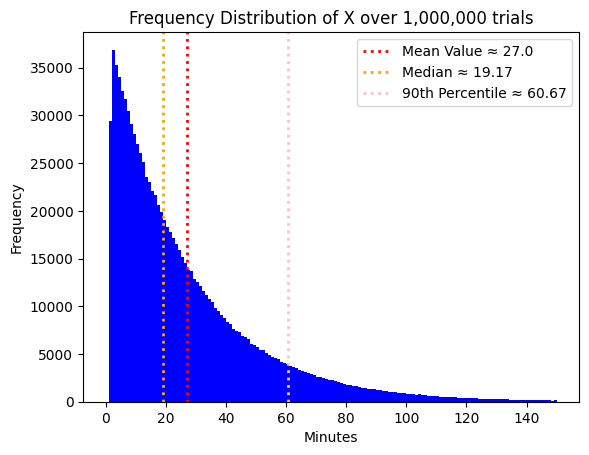

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a histogram
plt.hist(X, bins = 150, range = (0,150), color='blue')

percentile_90 = np.percentile(X, 90)
median = np.median(X)

plt.axvline(avgtime, color='red', linestyle='dotted', linewidth=2, label='Mean Value ≈ ' + str(round(avgtime,2)))
plt.axvline(median, color='orange', linestyle='dotted', linewidth=2, label='Median ≈ ' + str(round(median,2)))
plt.axvline(percentile_90, color='pink', linestyle='dotted', linewidth=2, label='90th Percentile ≈ ' + str(round(percentile_90,2)))

# Add titles and labels
plt.title('Frequency Distribution of X over 1,000,000 trials')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.legend()
plt.savefig('histogram_plot.png', dpi=300, bbox_inches='tight')
plt.show()